# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp =  city_weather['main']['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =   city_weather["dt"]

    
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | skibbereen
Processing Record 5 of Set 1 | collie
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | zapolyarnyy
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | naze
Processing Record 10 of Set 1 | chara
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | tefe
Processing Record 13 of Set 1 | erzin
Processing Record 14 of Set 1 | umkomaas
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | ilebo
Processing Record 18 of Set 1 | cabedelo
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | uinskoye
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | olafsvik
Processing 

Processing Record 38 of Set 4 | aksarka
Processing Record 39 of Set 4 | camopi
Processing Record 40 of Set 4 | bluff
Processing Record 41 of Set 4 | simpang
Processing Record 42 of Set 4 | galle
Processing Record 43 of Set 4 | pangnirtung
Processing Record 44 of Set 4 | coria
Processing Record 45 of Set 4 | oria
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | pirot
Processing Record 48 of Set 4 | griffith
Processing Record 49 of Set 4 | bousso
Processing Record 0 of Set 5 | los andes
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | bubaque
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | ponta delgada
Processing Record 5 of Set 5 | halalo
City not found. Skipping...
Processing Record 6 of Set 5 | mergui
City not found. Skipping...
Processing Record 7 of Set 5 | barrow
Processing Record 8 of Set 5 | praia
Processing Record 9 of Set 5 | arlit
Processing Record 10 of Set 5 | geraldton
Processing Record 11 of Set 5 | nyim

Processing Record 29 of Set 8 | mkokotoni
Processing Record 30 of Set 8 | kuchera
Processing Record 31 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 32 of Set 8 | saint-tite
Processing Record 33 of Set 8 | vice
Processing Record 34 of Set 8 | homer
Processing Record 35 of Set 8 | ancud
Processing Record 36 of Set 8 | nanning
Processing Record 37 of Set 8 | marcona
City not found. Skipping...
Processing Record 38 of Set 8 | rungata
City not found. Skipping...
Processing Record 39 of Set 8 | mazagao
Processing Record 40 of Set 8 | solnechnyy
Processing Record 41 of Set 8 | noumea
Processing Record 42 of Set 8 | asyut
Processing Record 43 of Set 8 | havre-saint-pierre
Processing Record 44 of Set 8 | kyakhulay
Processing Record 45 of Set 8 | forio
Processing Record 46 of Set 8 | karpogory
Processing Record 47 of Set 8 | aasiaat
Processing Record 48 of Set 8 | charlestown
Processing Record 49 of Set 8 | toliary
City not found. Skipping...
Processing Record 0 of Set 9 | v

Processing Record 16 of Set 12 | karratha
Processing Record 17 of Set 12 | biak
Processing Record 18 of Set 12 | culipapa
City not found. Skipping...
Processing Record 19 of Set 12 | manggar
Processing Record 20 of Set 12 | manchar
Processing Record 21 of Set 12 | half moon bay
Processing Record 22 of Set 12 | srivardhan
Processing Record 23 of Set 12 | andra
Processing Record 24 of Set 12 | vengerovo
Processing Record 25 of Set 12 | karla
Processing Record 26 of Set 12 | petropavl
Processing Record 27 of Set 12 | xuddur
Processing Record 28 of Set 12 | sao filipe
Processing Record 29 of Set 12 | nisia floresta
Processing Record 30 of Set 12 | novobessergenevka
Processing Record 31 of Set 12 | sisimiut
Processing Record 32 of Set 12 | reconquista
Processing Record 33 of Set 12 | dawlatabad
Processing Record 34 of Set 12 | guigue
Processing Record 35 of Set 12 | kavaratti
Processing Record 36 of Set 12 | urubicha
Processing Record 37 of Set 12 | panguna
Processing Record 38 of Set 12 | 

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
    


# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-2.79,95,100,9.13,RU,1675914772
1,port blair,11.6667,92.7500,82.44,69,40,11.50,IN,1675914755
2,dikson,73.5069,80.5464,-2.22,85,89,13.69,RU,1675914676
3,skibbereen,51.5500,-9.2667,40.21,85,12,4.79,IE,1675914998
4,collie,-33.3667,116.1500,86.70,24,0,6.73,AU,1675914998


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-2.79,95,100,9.13,RU,1675914772
1,port blair,11.6667,92.7500,82.44,69,40,11.50,IN,1675914755
2,dikson,73.5069,80.5464,-2.22,85,89,13.69,RU,1675914676
3,skibbereen,51.5500,-9.2667,40.21,85,12,4.79,IE,1675914998
4,collie,-33.3667,116.1500,86.70,24,0,6.73,AU,1675914998


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

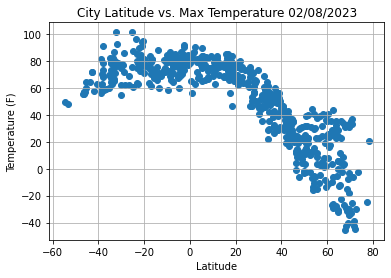

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

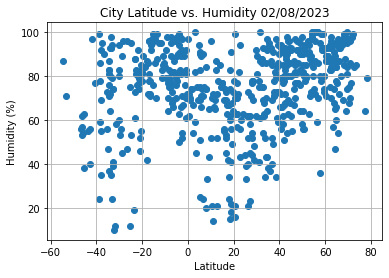

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

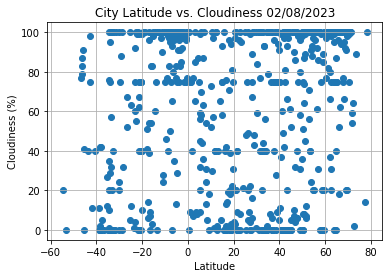

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

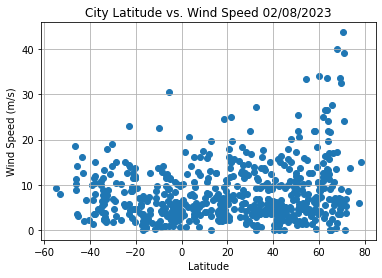

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

In [21]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-squared value is: {round(rvalue,2)}")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=14,color="red")

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(northern_hemisphere)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-2.79,95,100,9.13,RU,1675914772
1,port blair,11.6667,92.7500,82.44,69,40,11.50,IN,1675914755
2,dikson,73.5069,80.5464,-2.22,85,89,13.69,RU,1675914676
3,skibbereen,51.5500,-9.2667,40.21,85,12,4.79,IE,1675914998
5,norman wells,65.2820,-126.8329,-12.96,77,75,0.00,CA,1675914697


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(southern_hemisphere)


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,collie,-33.3667,116.1500,86.70,24,0,6.73,AU,1675914998
7,bredasdorp,-34.5322,20.0403,64.51,83,1,8.75,ZA,1675914661
10,hermanus,-34.4187,19.2345,67.80,83,76,11.41,ZA,1675914641
11,tefe,-3.3542,-64.7114,73.60,98,91,2.06,BR,1675914999
13,umkomaas,-30.2067,30.7978,74.68,80,100,14.16,ZA,1675915000


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: -0.87


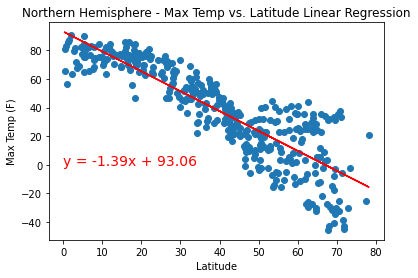

In [26]:
# Linear regression on Northern Hemisphere

equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.show()

The r-squared value is: 0.41


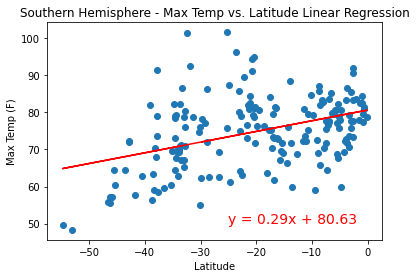

In [27]:
# Linear regression on Southern Hemisphere

equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(equation, -25, 50)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.show()

**Discussion about the linear relationship:** The northern hemisphere plot shows a strong negative correlation between Max temperature and Latitude. The relationship can be described as the higher northern values being increasingly lower in temperature. The southern hemisphere plot shows a medium posiitive correlation between Max temperature and Latitude. There is not a strong correlation here but there is a slight positive relationship. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.45


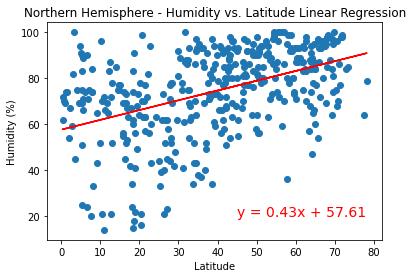

In [28]:
# Northern Hemisphere

equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 45, 20)
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

The r-squared value is: 0.34


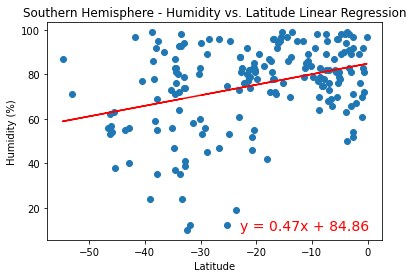

In [29]:
# Southern Hemisphere

equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, -23, 10)
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemispheres show a slight positive correlation between the Humidity percentage and Latitude. Both R-squared values are below 0.5 and therefore do not show a strong correlation between the two variables for either the nothern or the southern hemisphere.    

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.29


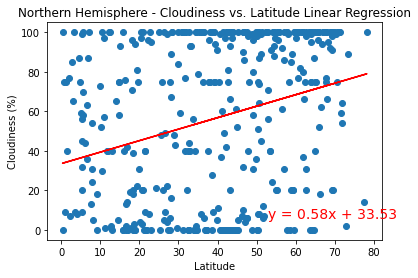

In [35]:
# Northern Hemisphere

equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 53, 6)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

The r-squared value is: 0.49


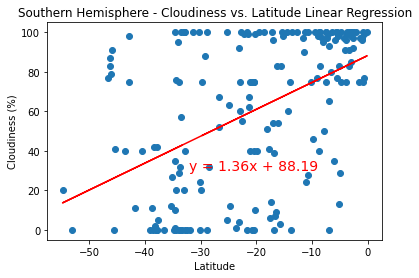

In [34]:
# Southern Hemisphere

equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, -32, 30)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

 **Discussion about the linear relationship:** Both the northern and southern hemispheres show a weak positive correlation within the r-sqaured values when comarping the Cloudiness percentage to the Latitude. Both scatter plots appear to have several outliers that do not fit the overall trend of the data. These do not seem to be scatter plots that fit the linear regression line. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.17


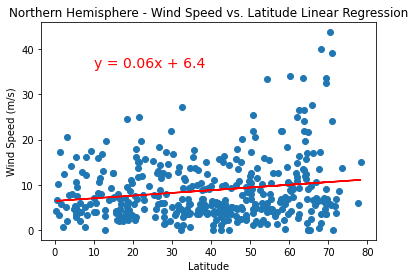

In [32]:
# Northern Hemisphere

equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 10, 36)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.show()

The r-squared value is: -0.19


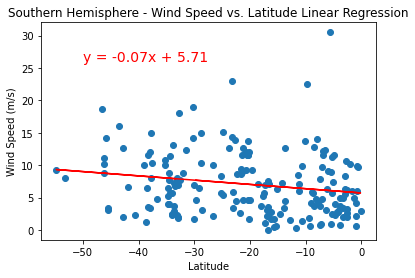

In [33]:
# Southern Hemisphere

equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation, -50, 26)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemispheres show no correlation between Wind Speed and Latitude. The plots for both hemispheres do not appear to be linear. Given that both r-squared values are <0.2, we can conclude that there is no correlation.  
